In [1]:
# Libraries
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('train.csv', index_col=False)
df.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


In [3]:
df.shape

(26570, 26)

In [4]:
df['failure'].value_counts()

0    20921
1     5649
Name: failure, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='failure', ylabel='count'>

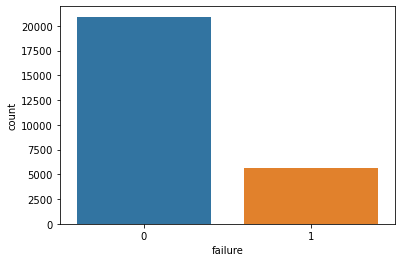

In [5]:
sns.countplot(df['failure'])

In [6]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df[(df['failure']==0)] 
df_minority = df[(df['failure']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 20921, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [7]:
df = df_upsampled

In [8]:
df.isnull().sum()

id                   0
product_code         0
loading            375
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      551
measurement_4      860
measurement_5     1108
measurement_6     1252
measurement_7     1466
measurement_8     1590
measurement_9     1907
measurement_10    1992
measurement_11    2269
measurement_12    2562
measurement_13    2838
measurement_14    3017
measurement_15    3123
measurement_16    3335
measurement_17    3640
failure              0
dtype: int64

In [9]:
df1=df.fillna(df.mean())

C:\Users\2216027\AppData\Local\Temp\1\ipykernel_29936\3725003345.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1=df.fillna(df.mean())


In [10]:
df1.shape

(41842, 26)

In [11]:
df1.attribute_1.unique()

array(['material_8', 'material_6', 'material_5'], dtype=object)

In [12]:
df1.attribute_0.unique()

array(['material_7', 'material_5'], dtype=object)

In [13]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df1['attribute_0']= label_encoder.fit_transform(df1['attribute_0'])
  
df1['attribute_0'].unique()

array([1, 0])

In [14]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df1['attribute_1']= label_encoder.fit_transform(df1['attribute_1'])
  
df1['attribute_1'].unique()

array([2, 1, 0])

<AxesSubplot:xlabel='product_code', ylabel='failure'>

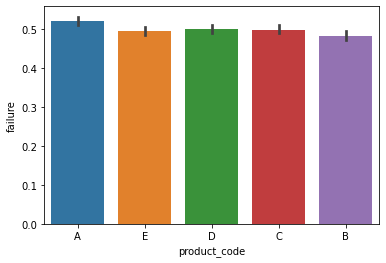

In [15]:
sns.barplot(data=df1, x="product_code", y="failure")

In [16]:
df1.shape

(41842, 26)

In [17]:
df2 = df1.drop(["product_code","id"], axis=1)

In [18]:
# apply the min-max scaling in Pandas using the .min() and .max() methods
def min_max_scaling(df):
    # copy the dataframe
    df_norm = df.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm
    
# call the min_max_scaling function
df3 = min_max_scaling(df2)

In [19]:
df3.dtypes

loading           float64
attribute_0       float64
attribute_1       float64
attribute_2       float64
attribute_3       float64
measurement_0     float64
measurement_1     float64
measurement_2     float64
measurement_3     float64
measurement_4     float64
measurement_5     float64
measurement_6     float64
measurement_7     float64
measurement_8     float64
measurement_9     float64
measurement_10    float64
measurement_11    float64
measurement_12    float64
measurement_13    float64
measurement_14    float64
measurement_15    float64
measurement_16    float64
measurement_17    float64
failure           float64
dtype: object

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

y = df3["failure"]
X = df3.drop("failure", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
y_test.shape

(12553,)

In [22]:
model = LogisticRegression()

In [23]:
model.fit(X_train, y_train)

LogisticRegression()

In [24]:
model.score(X_test, y_test)

0.564247590217478

In [25]:
pred = model.predict(X_test)

In [26]:
from sklearn.metrics import f1_score

In [27]:
f1_score(y_test, pred)

0.5417992963645502

In [28]:
pred

array([0., 1., 1., ..., 1., 1., 0.])

In [29]:
df_0 = pd.read_csv('test.csv', index_col=False)
df_0.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,26570,F,119.57,material_5,material_6,6,4,6,9,6,...,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612
1,26571,F,113.51,material_5,material_6,6,4,11,8,0,...,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037
2,26572,F,112.16,material_5,material_6,6,4,8,12,4,...,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995
3,26573,F,112.72,material_5,material_6,6,4,8,11,10,...,18.948,11.790,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301
4,26574,F,208.00,material_5,material_6,6,4,14,16,8,...,19.141,12.370,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044


In [30]:
df_0.isnull().sum()

id                   0
product_code         0
loading            223
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      329
measurement_4      409
measurement_5      508
measurement_6      624
measurement_7      720
measurement_8      846
measurement_9      904
measurement_10    1067
measurement_11    1136
measurement_12    1240
measurement_13    1303
measurement_14    1440
measurement_15    1542
measurement_16    1678
measurement_17    1740
dtype: int64

In [31]:
df_1 = df_0.fillna(df_0.mean())

C:\Users\2216027\AppData\Local\Temp\1\ipykernel_29936\4234943097.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_1 = df_0.fillna(df_0.mean())


In [32]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df_1['attribute_0']= label_encoder.fit_transform(df_1['attribute_0'])
  
df_1['attribute_0'].unique()

array([0, 1])

In [33]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df_1['attribute_1']= label_encoder.fit_transform(df_1['attribute_1'])
  
df_1['attribute_1'].unique()

array([1, 2, 0])

In [34]:
df_1 = df_1.drop(["product_code","id"], axis=1)

In [35]:
# apply the min-max scaling in Pandas using the .min() and .max() methods
def min_max_scaling(df_1):
    # copy the dataframe
    df_norm = df_1.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm
    
# call the min_max_scaling function
df_1 = min_max_scaling(df_1)

In [36]:
df_1

,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,0.235347,0.0,0.5,0.0,0.0,0.200000,0.272727,0.214286,0.733640,0.339119,...,0.459242,0.429123,0.475224,0.418083,0.595983,0.356914,0.571138,0.389254,0.623389,0.509978
1,0.217926,0.0,0.5,0.0,0.0,0.366667,0.242424,0.000000,0.551892,0.551402,...,0.546241,0.592839,0.340523,0.483767,0.494862,0.662416,0.563192,0.464839,0.325405,0.431359
2,0.214045,0.0,0.5,0.0,0.0,0.266667,0.363636,0.142857,0.627556,0.375895,...,0.352017,0.554372,0.555368,0.419437,0.372957,0.333173,0.497250,0.632164,0.483895,0.529624
3,0.215655,0.0,0.5,0.0,0.0,0.266667,0.333333,0.357143,0.377428,0.425294,...,0.495065,0.560628,0.634243,0.256788,0.374981,0.504652,0.492496,0.307237,0.491328,0.477498
4,0.489551,0.0,0.5,0.0,0.0,0.466667,0.484848,0.285714,0.542306,0.644374,...,0.518582,0.637828,0.381406,0.399391,0.453449,0.550289,0.527538,0.358699,0.577139,0.644076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20770,0.307701,1.0,0.0,1.0,0.2,0.000000,0.121212,0.321429,0.626278,0.629445,...,0.449372,0.547451,0.490378,0.561956,0.423945,0.644610,0.456095,0.496491,0.534692,0.559815
20771,0.105873,1.0,0.0,1.0,0.2,0.133333,0.242424,0.250000,0.681876,0.304891,...,0.369441,0.452815,0.483541,0.217119,0.579791,0.504090,0.467301,0.394371,0.523538,0.492765
20772,0.086325,1.0,0.0,1.0,0.2,0.333333,0.333333,0.071429,0.650690,0.527167,...,0.578165,0.380407,0.491295,0.633088,0.390627,0.586301,0.482852,0.420906,0.624876,0.629819
20773,0.254262,1.0,0.0,1.0,0.2,0.266667,0.484848,0.392857,0.379729,0.466319,...,0.571463,0.678025,0.440897,0.538696,0.249338,0.529997,0.610390,0.586257,0.414354,0.599090


In [37]:
final = model.predict(df_1)

In [38]:
final

array([0., 0., 0., ..., 0., 1., 0.])

In [39]:
submission = pd.DataFrame({'failure': final}, index=df_0.id)
submission.index.name = 'id'
submission.to_csv('submission.csv')

In [40]:
df = pd.read_csv('submission.csv', index_col=False)
df.head()

,id,failure
0,26570,0.0
1,26571,0.0
2,26572,0.0
3,26573,0.0
4,26574,1.0


In [41]:
df['failure'].value_counts()

0.0    13222
1.0     7553
Name: failure, dtype: int64